<a href="https://colab.research.google.com/github/craigalexander/DAS23/blob/main/Week_6_Lab_Simple_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Skills - Regression Modelling with Python




# Introduction

In Week 4, we covered how to model data in R using regression models. This week, we will look at how we can carry out the same tasks using Python. 

For this lab, we will be using the same examples as in week 4.

As before, the key ideas behind modelling the data is to infer a relationship between:


*   **outcome or response variable** $y$ and
*   an **explanatory (or predictor) variable(s)** $x$, which can be referred to as an **independent variable** or **covariate**

Modelling can be used for two purposes:


1.   **Explanation**: For describing the relationship between an outcome variable $y$ and an explanatory variable  $x$, and determining the potential significance of such relationships using quantifiable measures. 
2.   **Prediction**: for predicting the outcome variable  $y$ given information from one or more explanatory variables.



There are many different modelling techniques. However, we will begin with one of the easier to understand and commonly-used approaches, linear regression. In particular, we will start by looking at simple linear regression (SLR), where we only have one explanatory variable. We will then extend these models to allow for more than one explanatory variable using multiple linear regression (MLR).


# Simple Linear Regression

For a response variable  $y$ and an explanatory variable  $x$, the data can be expressed as:

$$(y_{i},x_{i}), i=1, \dots, n$$

That is, we have  $n$ observations of  $y$ and  $x$. A statistical model is a mathematical statement describing the variability in a random variable  $y$, which includes any relationship with the explanatory variable  $x$. The inclusion of random (unpredictable) components  $\epsilon$, makes the model statistical, rather than deterministic. A simple linear regression model involves, as the name suggests, fitting a linear regression line to the data. Hence, a simple linear regression model can be written as follows:



*   $y_i$ is the $i^{\text{th}}$ observation of the response variable;
*   $\alpha$ is the **intercept**; 
*   $\beta$ is the **slope** of the regression line;
*   $x_i$ is the $i^{\text{th}}$ observation of the explanatory variable; and
*   $\epsilon_i$ is the $i^{\text{th}}$ random component.

The random components, $\epsilon_i$, are normally distributed with constant variance $\sigma^2$, such that we are essentially adding random white noise to the deterministic part of the model $(\alpha + \beta x_i)$. Thus, the full probability model for $y_i$ given $x_i$ $(y_{i}|x_i)$ can be written as

$$(y_{i}|x_i) \sim N(\alpha + \beta x_i, \sigma^2)$$

Hence, the mean comes from the deterministic part of the model, while the variance comes from the random part. 

In the lab next week, we will look at how to choose between different models. For this lab, we will focus on using the p-value to decide which terms to include in the model. We will use the standard convention of choosing a 5% level of significnce, and then decide to include terms in the mdel if the p-value of the associated parameter estimate is less than 0.05 (i.e. reject the null hypothesis that the parameter is zero).

# Simple linear regression with one numerical explanatory variable

First, we will import the following libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Student feedback in higher education is extremely important when it comes to the evaluation of teaching techniques, materials, and improvements in teaching methods and technologies. However, there have been studies into potential bias factors when feedback is provided, such as the physical appearance of the teacher; see [Economics of Education Review](https://www.sciencedirect.com/journal/economics-of-education-review) for details. Here, we shall look at a study from student evaluations of  $n = 463$ professors from The University of Texas at Austin. In particular, we will examine the evaluation scores of the instructors based purely on one numerical variable: their beauty score. Therefore, our simple linear regression model will consist of



*   the numerical outcome variable *teaching score $(y)$*; and
*   the numerical explanatory variable *beauty score ($x$)*.



# Exploratory data analysis

Before you ever do any statistical modelling of data, you should always perform an **exploratory data analysis** of the data. Performing an exploratory data analysis can give us an idea of the distribution of the data, and whether it contains any strange values, such as **outliers** or **missing values**. However, more importantly, it is used to inform which statistical model we should fit to the data. An exploratory data analysis may involve:



1.   Looking at the raw values of the data, either looking in the spreadsheet directly, or using Python
2.   By computing various summary statistics, such as the *five-number summary*, means, and standard deviations.
3.   Plotting the data using various visualisation techniques

Firstly, we will need to read in the data `evals`. You can download the file from Moodle, or read this in via Github using the following command:




In [ ]:
evals_url = 'https://github.com/craigalexander/DAS23/raw/main/Data/evals.csv'
evals = pd.read_csv(evals_url,index_col=0) # set index_col=0 to specify first column should be an index

We can look at the raw values from `evals` using the `print` command

In [ ]:
print(evals)

     prof_ID  score  age  bty_avg  gender     ethnicity     language  \
ID                                                                     
1          1    4.7   36    5.000  female      minority      english   
2          1    4.1   36    5.000  female      minority      english   
3          1    3.9   36    5.000  female      minority      english   
4          1    4.8   36    5.000  female      minority      english   
5          2    4.6   59    3.000    male  not minority      english   
..       ...    ...  ...      ...     ...           ...          ...   
459       93    4.5   32    6.833    male  not minority      english   
460       94    3.5   42    5.333  female      minority  non-english   
461       94    4.4   42    5.333  female      minority  non-english   
462       94    4.4   42    5.333  female      minority  non-english   
463       94    4.1   42    5.333  female      minority  non-english   

             rank  pic_outfit pic_color  cls_did_eval  cls_stud

**Question** 

How many observations are in the `evals` dataset?

Currently, we are only interested in the instructors teaching (`score`) and beauty (`bty_avg`) scores, and so we can look at a subset of the data as follows:

In [ ]:
evals_scores = evals[["score","bty_avg"]]

The outcome variable `score` is a numerical average teaching score based on students' evaluations between 1 and 5. The explanatory variable `bty_avg` is the numerical variable of the average beauty score from a panel of six students' scores between 1 and 10.

As both variables are numerical, we can compute summary statistics for them using the `describe()` function as follows:

In [ ]:
evals_scores.describe()

,score,bty_avg
count,463.000000,463.000000
mean,4.174730,4.417844
std,0.543865,1.527380
min,2.300000,1.667000
25%,3.800000,3.167000
50%,4.300000,4.333000
75%,4.600000,5.500000
max,5.000000,8.167000


This provides us with a numerical summary of the data, similar to the output of the `summary` function in R.

These summary statistics give us an idea of how both variables are distributed. For example, the mean teaching score (`score`) is 4.17 out of 5, while the mean beauty score (`bty_avg`) is 4.42 out of 10. Also, the middle 50% of the data for `score` lies between 3.8 and 4.6, while the middle 50% of `bty_avg` lies between 3.17 and 5.5. 

# Correlation

The above summary statistics provide information about each variable separately. However, we are interested in a potential relationship between the two variables and as such it would be of interest to evaluate some statistic that considers both variables simultaneously. One such statistic is the **correlation**, which ranges between -1 and 1 and describes the strength of the linear relationship between two numerical variables, such that



*   -1 indicates a perfect *negative relationship*. That is, as the values of one variable increase, the values of the other decrease.
*   0 indicates no relationship. The values of both variables increase/decrease independently of one another.
*   1 indicates a perfect *positive relationship*. That is, the values of both variables increase simultaneously.

The correlation coefficient can be computed in Python using the `corr` function. We can obtain the correlation matrix of a data frame by using the structure `dataframe.corr()`, replacing `dataframe` with our data frame of interest. To obtain the singlular correlation value between two specific colums, we can specify `print(dataframe['column1'].corr(dataframe['column2']))`, where `dataframe` is our data frame of interest and `column1` & `column2` correspond to our columns of interest.



In [ ]:
print(evals_scores.corr())


            score   bty_avg
score    1.000000  0.187142
bty_avg  0.187142  1.000000


In [ ]:
print(evals_scores['score'].corr(evals_scores['bty_avg']))

0.18714235486847425


Here, we are given a correlation coefficient of 0.187 for the relationship between teaching (`score`) and beauty (`bty_avg`) scores. This suggests a rather weakly positive linear relationship between the two variables. There is some subjective interpretation surrounding correlation coefficients not very close to -1, 0, 1. The table below provides a rough guide as to the verbal interpretation of a correlation coefficient.

Correlation coefficient | Verbal interpretation
:-----------------------|:----------------------
0.90 to 1.00 (-0.90 to -1.00) | Very strong positive (negative) correlation
0.70 to 0.90 (-0.70 to -0.90) | Strong positive (negative) correlation
0.50 to 0.70 (-0.50 to -0.70) | Moderate positive (negative) correlation
0.30 to 0.50 (-0.30 to -0.50) | Weak positive (negative) correlation
0.00 to 0.30 (0.00 to -0.30) | Very weak positive (negative) correlation


The next step in our exploratory data analysis is to visualise the data using appropriate plotting techniques. We can either use the `matplotlib` or `seaborn` libraries for plotting. Here, we will focus on using `seaborn` as it's interface is similar to `qplot` in `ggplot2`.


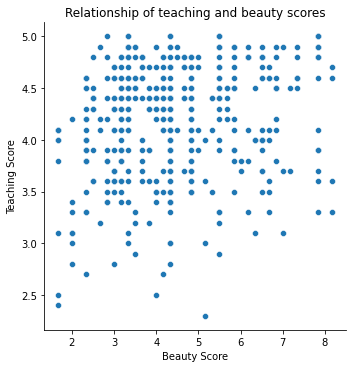

In [ ]:
sp=sns.relplot(x="bty_avg",y="score",data=evals_scores)
sp.set(xlabel='Beauty Score',ylabel='Teaching Score',title='Relationship of teaching and beauty scores')
plt.show()

What can we observe from the scatterplot? Well, here it can be hard to see the weakly positive linear relationship suggested by the correlation coefficient (0.187), which is why our correlation coefficient is considered very weak in the verbal interpretation.

Additionally, as our numerical variables are averages of integers (or whole numbers), a lot of the values will be plotted on top of one another. Remember, from Week 1, that this is referred to as over-plotting, and can be alleviated by slightly nudging (jittering) the points in a random direction. For example, let's look at the three points in the top-right of the scatterplot that have a beauty score slightly less than 8. Are there really only three values plotted there, or are there more that we cannot see due to over-plotting? Let's find out by adding some jitter to the plot. 

We can add jitter to a `seaborn` plot by using the `regplot` command, which is used to superimpose a regression fit onto a plot. The jitter can be controlled in both directions using the `x_jitter` and `y_jitter` commands. 

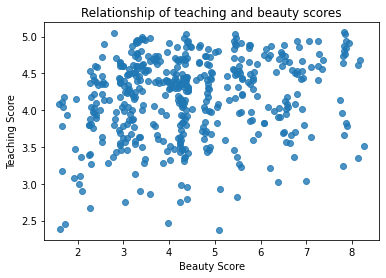

In [ ]:
sp=sns.regplot(data = evals_scores, x = 'bty_avg', y = 'score', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1)
sp.set(xlabel='Beauty Score',ylabel='Teaching Score',title='Relationship of teaching and beauty scores')
plt.show()

From the jittered scatterplot we can see that:


1.   There are actually more than just three points plotted in the top-right; and
2.   There are more instructors with a beauty score between 3 and 4.5 than originally appears due to over-plotting.

**Note**: jittering does not actually change the values within a data set, it is merely a tool for visualisation purposes. Hence, we shall continue on with plotting the original data.



# Formal analysis

After completing an exploratory data analysis the next step is to perform a **formal analysis** on the data. This involves constructing an appropriate statistical model from the information gathered during the exploratory data analysis step. Here, we shall be fitting a simple linear regression model to the data on teaching and beauty scores, where our objective is to acquire the best fitting regression line. This is done by finding estimates of the intercept (α) and slope (β) which give us the best-fitting line to the data. This can be done in Python using the class `OLS` from `statsmodels.api` to fit a linear model to the data. 

In order to fit the regression model, we will have to define our design matrix $X$ and response variables as follows:

In [ ]:
n = evals_scores.shape[0]
X = np.stack((np.ones(n),(evals_scores['bty_avg'])),axis=1) # Creates the design matrix X by including column for intercept
y = evals_scores['score']

Next we set up the model fitting algorithm (prior to this, you can split the data into test and training data, but we will not cover that here):

In [ ]:
model = sm.OLS(y,X)
result=model.fit()


We can obtain a summary of the model fit (in a similar fashion to R) by using the `summary` method

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           5.08e-05
Time:                        13:27:41   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

This tells us that our best-fitting line to the data is:

$$\widehat{\mbox{score}} = \widehat{\alpha} + \widehat{\beta} x_i = 3.88  + 0.067 \cdot \mbox{bty_avg}$$

where

  * $\widehat{\alpha} = 3.8803$ is the intercept coefficient and means that, for any instructor with a `bty_avg = 0`, their average teaching `score` would be 3.8803. Note that `bty_avg = 0` is not actually possible as  `bty_avg` is an average of beauty scores ranging between 1 and 10.
  * $\widehat{\beta} = 0.0666$ is the slope coefficient associated with the exploratory variable `bty_avg`, and summarises the relationship between `score` and `bty_avg`. That is, as `bty_avg` increases, so does `score`, such that
    * For every 1 unit increase in `bty_avg`, there is an associated increase of, on average, 0.0067 units of `score`.

Finally, we can superimpose our best-fitting line onto our scatterplot to see how it fits through the points using the `regplot` function as follows:

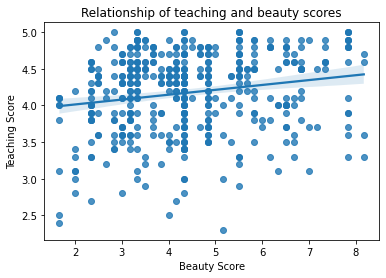

In [ ]:
sp=sns.regplot(data = evals_scores, x = 'bty_avg', y = 'score', fit_reg = True)
sp.set(xlabel='Beauty Score',ylabel='Teaching Score',title='Relationship of teaching and beauty scores')
plt.show()

Now that we have fitted our simple linear regression model to the data, how do we use it to obtain information on individual data points? This can be done by looking at the **fitted values**. For example, let's say we are interested in looking at the 21st instructor who has the following teaching and beauty scores:

| `score`| `bty_avg`|
|-----:|-------:|
|   4.9|   7.33|

What would the `score` be on our best-fitting line for this instructor with a `bty_avg` of 7.33? We simply plug the instructor's `bty_avg` into our regression model:

$$\widehat{\mbox{score}} = 3.88034 + 0.06664 \cdot \mbox{bty_avg} = 3.88034 + 0.06664 \cdot 7.33 = 4.369,$$
The regression model gives our instructor a `score` of 4.369. However, we know the `score` of the instructor is 4.9 meaning that our model was out by 0.531. This is known as the **residual** ($\epsilon$) and can be thought of as the error or *lack of fit* of the regression line. In this case, the residual is given by:

$$ \widehat{\epsilon} = y - \widehat{y} = 4.9 - 4.369 = 0.531.$$
This is essentially the distance between the fitted regression line and the observed (true) value.


**Question**

Obtain the observed `score` and `bty_avg` for the 27th instructor.

To obtain the fitted values and residuals for all instructors within the data set, we can use the `fittedvalues` function and the `resid` function to find both of these values. 

ID
1      4.213523
2      4.213523
3      4.213523
4      4.213523
5      4.080249
         ...   
459    4.335669
460    4.235713
461    4.235713
462    4.235713
463    4.235713
Length: 463, dtype: float64
ID
1      0.486477
2     -0.113523
3     -0.313523
4      0.586477
5      0.519751
         ...   
459    0.164331
460   -0.735713
461    0.164287
462    0.164287
463   -0.135713
Length: 463, dtype: float64


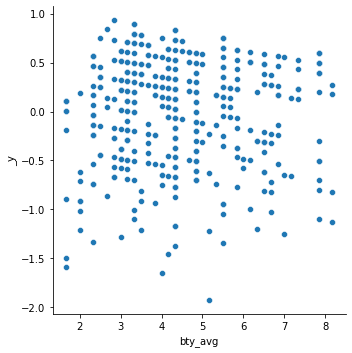

In [ ]:
print(result.fittedvalues)
print(result.resid)

# Assessing model fit

When we fit a simple linear regression model there are five main assumptions that we need to hold true in order for the model to be an appropriate fit to the data. These assumptions are:

1. The deterministic part of the model captures all the non-random structure in the data, i.e. the residuals have mean zero.
2. The scale of the variability of the residuals is constant at all values of the explanatory variables.
3. The residuals are normally distributed.
4. The residuals are independent.
5. The values of the explanatory variables are recorded without error.

One way we can check our first assumption is to plot the residuals (`residuals`) against the explanatory variable (`bty_avg`). From this we should be able to check that the explanatory variable has a linear relationship with the outcome variable (`score`). We can plot the residuals against our explanatory variable using:

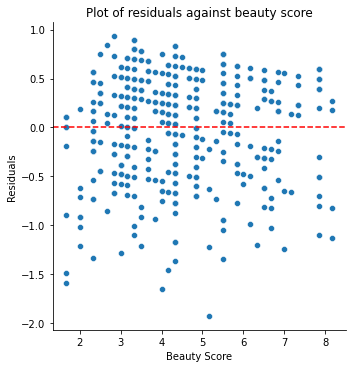

In [ ]:
sp=sns.relplot(x=evals_scores['bty_avg'],y=result.resid)
sp.set(xlabel='Beauty Score',ylabel='Residuals',title='Plot of residuals against beauty score')
plt.axhline(y=0,ls="--",color="red")
plt.show()


Ideally, for the first assumption to hold we should observe the following:

  * There should be no systematic pattern, i.e.\ the residuals should appear randomly scattered.
  * The residuals should have mean zero. That is, they should be evenly scattered above and below the zero line. This is because the regression model will overestimate some of the fitted values, but it will also underestimate some, and hence, on average, they should even out to have mean zero.

We can examine our first two assumptions by also plotting the residuals against the fitted values as follows:







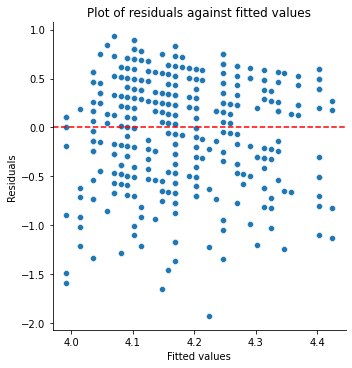

In [ ]:
sp=sns.relplot(x=result.fittedvalues,y=result.resid)
sp.set(xlabel='Fitted values',ylabel='Residuals',title='Plot of residuals against fitted values')
plt.axhline(y=0,ls="--",color="red")
plt.show()

From the plot of the residuals against the fitted values we want to examine whether:

  * The residuals have mean zero.
  * If the residuals have constant variance across all levels of the fitted values. That is, the range (or spread) of the residuals should be similar across all levels of the fitted values and display no obvious changes in variability.

  We can see from the above plot that both of these assumptions do appear to hold.

To assess our third assumption that the residuals are normally distributed we can simply plot a histogram of the residuals, with a superimposed kernel density estimite attached (this can be removed by setting `kde=False`:

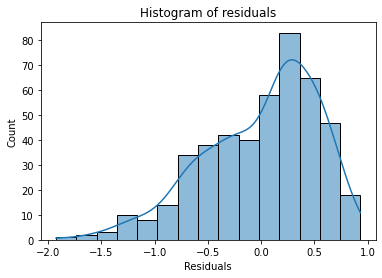

In [ ]:
sp=sns.histplot(x=result.resid,kde=True)
sp.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

Ideally, for the assumption of normally distributed residuals, the histogram should be bell-shaped and centred at zero, i.e. the residuals have mean zero. However, in practice this will almost never be the case, and as such, like the plots of the residuals, there is some subjectivity in whether you believe the assumptions hold. For instance, here we can see that the histogram is slightly skewed to the left in that the distribution has a longer tail to the left. However, in my opinion, this is not of much concern as the histogram appears to be relatively symmetrical and bell-shaped, and as such the assumption of normally distributed random errors appears valid in this case.  

Finally, assumptions 4. and 5. are often justified on the basis of the experimental context and are not formally examined.

# Simple linear regression with one categorical explanatory variable

Here, we will fit a simple linear regression model were the explanatory variable is categorical. A **categorical variable** is a variable of a fixed number of possible values, assigning units to particular groups (or categories) based on qualitative properties.

We shall examine the `gapminder` data set from the `gapminder` library in R. We will use a csv version of this data for our example. This is a data set on life expectancy across various countries around the world. We will explore life expectancy and its potential differences:

  * Between continents: Does life expectancy vary, on average, between the five continents of the world?; and
  * Within continents: Does life expectancy vary, on average, within the five continents of the world?

Thus, we will be looking at:

  * life expectancy as our numerical outcome variable $y$; and
  * the continent a country is within as our categorical variable $x$.

Before we begin, we should read in the data. Again, you can do this using the following code, or read in locally by downloading the data from Moodle

In [ ]:
url = 'https://github.com/craigalexander/DAS23/raw/main/Data/gapminder.csv'
gapminder = pd.read_csv(url,index_col=False)

# We will need to convert some data to categories - BE SURE TO RUN THIS, EVEN IF READING IN LOCALLY!
gapminder['country'] = gapminder.country.astype('category')
gapminder['continent'] = gapminder.continent.astype('category')

# Exploratory Data Analysis

Let's examine a subset of the `gapminder` data set relating to the year 2007. First, we will subset the data using `pandas`

In [ ]:
gapminder2007 = gapminder.loc[gapminder['year'] == 2007]
print(gapminder2007)


                 country continent  year  lifeExp       pop     gdpPercap
11           Afghanistan      Asia  2007   43.828  31889923    974.580338
23               Albania    Europe  2007   76.423   3600523   5937.029526
35               Algeria    Africa  2007   72.301  33333216   6223.367465
47                Angola    Africa  2007   42.731  12420476   4797.231267
59             Argentina  Americas  2007   75.320  40301927  12779.379640
...                  ...       ...   ...      ...       ...           ...
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906
1691              Zambia    Africa  2007   42.384  11746035   1271.211593
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298

[142 rows x 6 columns]


We can take a closer look at the variable types in the data frame by running the command below

In [ ]:
gapminder2007.dtypes

country      category
continent    category
year            int64
lifeExp       float64
pop             int64
gdpPercap     float64
dtype: object

We can see that both `country` and `continent` are `category` types, which is how Python and `pandas` stores categorical variables. For this example, we will take a look at `lifeExp` and `continent`. 

In [ ]:
gapminder2007 = gapminder2007[["continent","lifeExp"]]
print(gapminder2007)

     continent  lifeExp
11        Asia   43.828
23      Europe   76.423
35      Africa   72.301
47      Africa   42.731
59    Americas   75.320
...        ...      ...
1655      Asia   74.249
1667      Asia   73.422
1679      Asia   62.698
1691    Africa   42.384
1703    Africa   43.487

[142 rows x 2 columns]


Again, we can take a quick look at a numerical summary of the data as follows:

In [ ]:
gapminder2007.describe(include='all')

,continent,lifeExp
count,142,142.000000
unique,5,NaN
top,Africa,NaN
freq,52,NaN
mean,NaN,67.007423
std,NaN,12.073021
min,NaN,39.613000
25%,NaN,57.160250
50%,NaN,71.935500
75%,NaN,76.413250


The summary output for the numerical variable `lifeExp` is the same as we have seen previously. However, for the categorical variable `continent` we observe no numerical summaries. Instead, we obtain the following:



*   `unique` - the number of levels (or categories) of the variable
*   `top` - the category with the most observations
*  `count` - the total count for the top category



We can summarise any differences in life expectancy by continent and taking a look at the median and mean life expectancies for each continent using

In [ ]:
gapminder2007.groupby("continent").agg(["mean","median"])


lifeExp         
                mean   median
continent                    
Africa     54.806038  52.9265
Americas   73.608120  72.8990
Asia       70.728485  72.3960
Europe     77.648600  78.6085
Oceania    80.719500  80.7195

**Question**

Which continent has the lowest life expectancy?

Boxplots are often used when examining the distribution of a numerical outcome variable across different levels of a categorical variable:

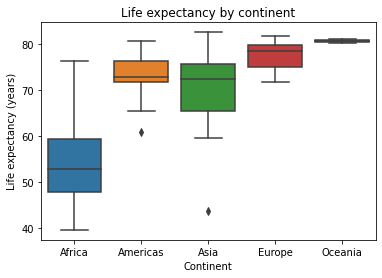

In [ ]:
sp=sns.boxplot(x="continent",y="lifeExp",data=gapminder2007)
sp.set(xlabel='Continent',ylabel="Life expectancy (years)",title='Life expectancy by continent')
plt.show()

Here, we can see that the middle 50% of the life expectancy distribution of Africa is much smaller than, and does not overlap with, the middle 50% of the remaining four continents, while the country with the highest life expectancy in Africa is less than all countries in Oceania. Speaking of Oceania, there is almost no variability (or spread) in life expectancy in this continent, however that may well be because it consists of only two countries (Australia and New Zealand). There is more variability in life expectancy in the continents of Africa and Asia.

# Formal Analysis

When examining the relationship between a numerical outcome variable $y$ and a categorical explanatory variable $x$, we are not just looking to find the best-fitting line to the data as before, but are examining relative differences to a baseline category. 

Now let us fit our regression model to the data, where `lifeExp` is our outcome variable $y$ and `continent` is our categorical explanatory variable $x$. As before, we will first have to define our variables needed to fit our model. For categorical variables, we have to create a matrix of dummy variables so this can be coded to work in `OLS`:

In [ ]:
X=pd.get_dummies(gapminder2007['continent'],drop_first=True) # Create a dummy matrix - drop_first drops the first continent Africa to use as our baseline
X = sm.add_constant(X)
y = gapminder2007['lifeExp']

model = sm.OLS(y,X)
result=model.fit() # Fit model

print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     59.71
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           4.22e-29
Time:                        11:10:05   Log-Likelihood:                -483.05
No. Observations:                 142   AIC:                             976.1
Df Residuals:                     137   BIC:                             990.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8060      1.025     53.446      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Note**: For now we will ignore the last five columns of the regression table and only focus on the estimate column.

We obtain five estimates: the `intercept` term and four others relating to the continents (`continentAmericas`, `continentAsia`, `continentEurope` and `continentOceania`), such that our regression equation is given as:

$$\widehat{\mbox{life exp}} = \widehat{\alpha} + \widehat{\beta}_{\mbox{Amer}} \cdot \mathbb{I}_{\mbox{Amer}}(x) + \widehat{\beta}_{\mbox{Asia}} \cdot \mathbb{I}_{\mbox{Asia}}(x) + \widehat{\beta}_{\mbox{Euro}} \cdot \mathbb{I}_{\mbox{Euro}}(x) + \widehat{\beta}_{\mbox{Ocean}} \cdot \mathbb{I}_{\mbox{Ocean}}(x),$$

where

  * the intercept $\widehat{\alpha}$ is the mean life expectancy for our baseline category Africa;
  * $\widehat{\beta}_{\mbox{continent}}$ is the difference in the mean life expectancy of a given continent relative to the baseline category Africa; and
  * $\mathbb{I}_{\mbox{continent}}(x)$ is an indicator function such that
  
$$\mathbb{I}_{\mbox{continent}}(x)=\left\{
\begin{array}{ll}
1 ~~~ \mbox{if country} ~ x ~ \mbox{is in the continent},\\
0 ~~~ \mbox{Otherwise}.\\
\end{array}
\right.$$



Essentially, the estimates for each continent are known as *offsets* relative to the baseline category (Africa in this case). For example, the mean life expectancy for Africa is simply equal to the intercept term $\widehat{\alpha} = 54.8$. However, the mean life expectancy for Asia is $\widehat{\alpha} + \widehat{\beta}_{\mbox{Asia}} \cdot \mathbb{I}_{\mbox{Asia}}(x) = 54.8 + 15.9 \cdot 1 = 70.7$.

**Question**

From the regression model, what is the mean life expectancy of the Americas?



# Assessing model fit

We can now take a look at the fitted values and residuals in the same way we did previously:

In [ ]:
print(result.fittedvalues)
print(result.resid)

11      70.728485
23      77.648600
35      54.806038
47      54.806038
59      73.608120
          ...    
1655    70.728485
1667    70.728485
1679    70.728485
1691    54.806038
1703    54.806038
Length: 142, dtype: float64
11     -26.900485
23      -1.225600
35      17.494962
47     -12.075038
59       1.711880
          ...    
1655     3.520515
1667     2.693515
1679    -8.030485
1691   -12.422038
1703   -11.319038
Length: 142, dtype: float64


You can adjust the code above to join the residuals and fitted values together with the gapminder data with countries attached to find similar conclusions we explored in Week 4.

For assessing the assumptions surrounding the residuals for a categorical explanatory variable, we can plot the residuals for each continent (NB - the regplot in `seaborn` does not work with categorical variables to apply jitter, so we will avoid the extra steps here to include this):

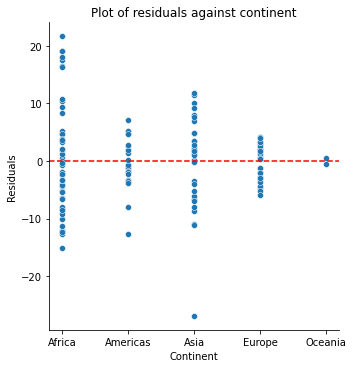

In [ ]:
sp=sns.relplot(x=gapminder2007['continent'],y=result.resid)
sp.set(xlabel='Continent',ylabel='Residuals',title='Plot of residuals against continent')
plt.axhline(y=0,ls="--",color="red")
plt.show()

Here, we see that there is an even spread of the residuals above and below the zero line for each continent, and hence our assumption that the residuals have mean zero appears valid. There is an outlier observed for Asia with a large negative residual (relating to Afghanistan).

To check that the residual errors are normally distributed, we plot a histogram of them:

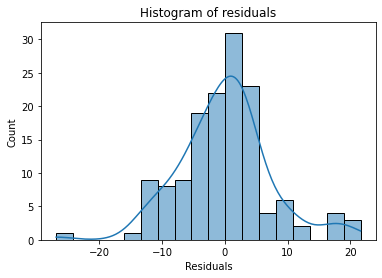

In [ ]:
sp=sns.histplot(x=result.resid,kde=True)
sp.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

**Question**
Are the residuals normally distributed with mean zero?

# Further tasks

Perform a formal analysis of the relationship between teaching score and age by fitting a simple linear regression model. Superimpose your best-fitting line onto the scatterplot of the data. 

Perform the same analysis we did on life expectancy from the `gapminder` data set in 2007. However, subset the data for the year 1997. Are there any differences in the results across this 10 year period?